# compute kinetic energy from mooring surface currents
Data was downloaded from the ifremer [ftp](ftp://ftp.ifremer.fr/ifremer/oceansites/DATA/)

In [2]:
import os, sys
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline

In [48]:
#ds = xr.open_dataset('OS_T0N110W_DM072A-20140621_D_CURR_20min.nc')
ds = xr.open_dataset('OS_T0N140W_DM092A-20140916_R_CURR_hourly.nc')
#u, v = ds['UCUR'].where(np.abs(ds['UCUR']<1e10), ds['VCUR'].where(ds['VCUR']<1e10)
u, v = ds['UCUR'].where(ds.UCUR_QC<4), ds['VCUR'].where(ds.UCUR_QC<4)
ke = (u**2 + v**2).rename('kinetic energy')

In [49]:
print(ds)

<xarray.Dataset>
Dimensions:    (DEPTH: 5, LATITUDE: 1, LONGITUDE: 1, TIME: 4437)
Coordinates:
  * TIME       (TIME) datetime64[ns] 2014-09-16T05:30:00 ...
  * DEPTH      (DEPTH) float32 10.0 25.0 45.0 80.0 120.0
  * LATITUDE   (LATITUDE) float32 0.0
  * LONGITUDE  (LONGITUDE) float32 -140.0
Data variables:
    UCUR       (TIME, DEPTH) float32 ...
    UCUR_QC    (TIME, DEPTH) float32 2.0 2.0 2.0 2.0 2.0 9.0 2.0 2.0 2.0 2.0 ...
    UCUR_DM    (TIME, DEPTH) |S1 ...
    VCUR       (TIME, DEPTH) float32 ...
    WCUR       (TIME, DEPTH) float32 ...
    CSPD       (TIME, DEPTH) float32 ...
    CSPD_QC    (TIME, DEPTH) float32 ...
    CSPD_DM    (TIME, DEPTH) |S1 ...
    CDIR       (TIME, DEPTH) float32 ...
Attributes:
    time_coverage_start:           2014-09-16T05:30:00Z
    time_coverage_end:             2015-03-22T11:00:00Z
    featureType:                   timeSeriesProfile
    format_version:                1.3
    platform_code:                 T0N140W
    platform_type:             

In [50]:
print(u)

<xarray.DataArray (TIME: 4437, DEPTH: 5)>
array([[-77.5     , -71.      , -52.5     ,  -0.899963,  66.      ],
       [       nan, -66.2     , -53.9     ,  -2.20001 ,  57.2     ],
       [-72.6     , -66.2     , -53.9     ,  -2.20001 ,  57.2     ],
       ...,
       [       nan,  16.5     ,  36.6     ,  70.      , 124.8     ],
       [       nan,  17.3     ,  30.6     ,  69.8     , 131.      ],
       [       nan,  16.      ,  32.8     ,  71.      , 122.6     ]],
      dtype=float32)
Coordinates:
  * TIME     (TIME) datetime64[ns] 2014-09-16T05:30:00 ...
  * DEPTH    (DEPTH) float32 10.0 25.0 45.0 80.0 120.0
Attributes:
    standard_name:         eastward_sea_water_velocity
    long_name:             Zonal Current
    units:                 cm/s
    valid_min:             -600.0
    valid_max:             600.0
    accuracy:              5.0
    resolution:            0.1
    sensor_name:           Dopper Current Meter [SonTek/Argonaut-MD]
    sensor_serial_number:  D759/10m D829/25m 

In [51]:
print(v)

<xarray.DataArray (TIME: 4437, DEPTH: 5)>
array([[ -7.29999,  -7.70001, -34.1    , -20.1    ,  -5.59998],
       [      nan,  -6.79999, -31.     , -22.8    , -10.5    ],
       [ -6.20001,  -6.79999, -31.     , -22.8    , -10.5    ],
       ...,
       [      nan,  56.7    ,  53.3    ,  40.2    ,  47.2    ],
       [      nan,  50.5    ,  48.6    ,  36.1    ,  42.9    ],
       [      nan,  50.6    ,  47.9    ,  35.5    ,  40.2    ]], dtype=float32)
Coordinates:
  * TIME     (TIME) datetime64[ns] 2014-09-16T05:30:00 ...
  * DEPTH    (DEPTH) float32 10.0 25.0 45.0 80.0 120.0
Attributes:
    standard_name:         northward_sea_water_velocity
    long_name:             Meridional Current
    units:                 cm/s
    valid_min:             -600.0
    valid_max:             600.0
    accuracy:              5.0
    resolution:            0.1
    sensor_name:           Dopper Current Meter [SonTek/Argonaut-MD]
    sensor_serial_number:  D759/10m D829/25m D828/45m D764/80m D762/120m
  

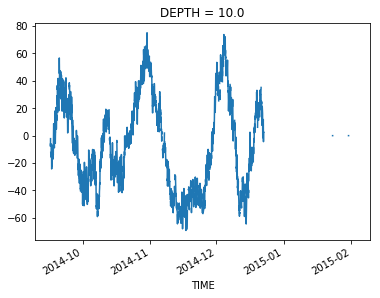

In [53]:
v.sel(DEPTH=10).plot()

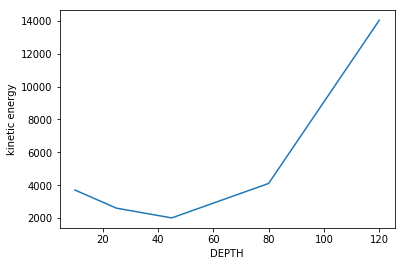

In [54]:
ke.mean(dim='TIME').plot()

In [47]:
print(ds.UCUR_QC)

<xarray.DataArray 'UCUR_QC' (TIME: 4437, DEPTH: 5)>
array([[2., 2., 2., 2., 2.],
       [9., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.],
       ...,
       [9., 2., 2., 2., 2.],
       [9., 2., 2., 2., 2.],
       [9., 2., 2., 2., 2.]], dtype=float32)
Coordinates:
  * TIME     (TIME) datetime64[ns] 2014-09-16T05:30:00 ...
  * DEPTH    (DEPTH) float32 10.0 25.0 45.0 80.0 120.0
Attributes:
    long_name:      quality flag
    valid_min:      0
    valid_max:      9
    flag_values:    [0 1 2 3 4 5 9]
    flag_meanings:  unknown good_data probably_good_data questionable_data ba...
